Poniższy kod otwiera plik z danymi oryginalnymi, a następnie wczytuje dane z 2010 roku zgodnie z poleceniem

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pth = os.getcwd()
pth = pth[:-14] + "\Original Data\\weather.txt"

with open(pth) as f:
    data = f.readlines()

data2010 = []
    
for line in data:
    if "2010" in line[0:21]:
        data2010.append(line)


Poniższy kod został poświęcony uporządkowywaniu danych oraz odpowiedniemu przepisaniu ich z racji bardzo nieczytelnego formatu danych oryginalnych. Jedynie dane z pierwszych pięciu miesięcy, o maksymalnych i minimalnych temperaturach zostają wyciągnięte, a następnie ich kodowanie rozszyfrowane w celu poprawienai czytelności. Na sam koniec zostaje ytworzony odpowiedni DataFrame i usuwane są z niego wyniki, które zostały uznane za błędy grube bądz ich format się nie zgadza.

In [16]:
alldata = []
i = 0
for month in data2010:
    if "PRCP" not in month:
        essentials = ["MX17004",2010,month[15:17],month[17:21]]
        mondata = month[21:].split()
        alldata.append(essentials + mondata)
        i += 1
    if i == 10:
        break
alldata2 = [list(i) for i in zip(*alldata)]
df = pd.DataFrame(alldata2).T


df.columns = ["id","year","month","element","day1","day2","day3","day4","day5","day6","day7",
                                "day8","day9","day10","day11","day12","day13","day14","day15","day16","day17","day18","day19","day20",
                                "day21","day22","day23","day24","day25","day26","day27","day28","day29","day30","day31"]

df = df.replace(to_replace=["-9999","S-9999","S"],value="--")
df = pd.melt(df,["id","year","month","element"])
df = df[df.value !="--"]
df = df.replace(to_replace=["day"],value="",regex=True)
print(df)

          id  year month element variable value
12   MX17004  2010    02    TMAX        2   273
13   MX17004  2010    02    TMIN        2   144
32   MX17004  2010    02    TMAX        4   241
33   MX17004  2010    02    TMIN        4   144
44   MX17004  2010    03    TMAX        5   321
45   MX17004  2010    03    TMIN        5   142
94   MX17004  2010    03    TMAX       10   345
95   MX17004  2010    03    TMIN       10   168
112  MX17004  2010    02    TMAX       12   297
113  MX17004  2010    02    TMIN       12   134
154  MX17004  2010    03    TMAX       16   311
155  MX17004  2010    03    TMIN       16   176
232  MX17004  2010    02    TMAX       24   299
233  MX17004  2010    02    TMIN       24   107
266  MX17004  2010    04    TMAX       27   363
267  MX17004  2010    04    TMIN       27   167
268  MX17004  2010    05    TMAX       27   332
269  MX17004  2010    05    TMIN       27   182
290  MX17004  2010    01    TMAX       30   278
291  MX17004  2010    01    TMIN       3

Kolejnym krokiem jest przekształcenie danych tak by data otrzymania poszczególnego wyniku była łatwo odczytywalna, a następnie wykonywane jest wyświetlenie otrzymanych wyników.

In [17]:
df = df.assign(date = df.year.astype(str) + "-" + df.month.astype(str) + "-" + df.variable.astype(str)[:] )
df.pop("year")
df.pop("month")
df.pop("variable")
df = df[["id","date","element","value"]]

# komenda zapisująca dane do pliku
# df.to_csv("weatherData")
print(df)

          id        date element value
12   MX17004   2010-02-2    TMAX   273
13   MX17004   2010-02-2    TMIN   144
32   MX17004   2010-02-4    TMAX   241
33   MX17004   2010-02-4    TMIN   144
44   MX17004   2010-03-5    TMAX   321
45   MX17004   2010-03-5    TMIN   142
94   MX17004  2010-03-10    TMAX   345
95   MX17004  2010-03-10    TMIN   168
112  MX17004  2010-02-12    TMAX   297
113  MX17004  2010-02-12    TMIN   134
154  MX17004  2010-03-16    TMAX   311
155  MX17004  2010-03-16    TMIN   176
232  MX17004  2010-02-24    TMAX   299
233  MX17004  2010-02-24    TMIN   107
266  MX17004  2010-04-27    TMAX   363
267  MX17004  2010-04-27    TMIN   167
268  MX17004  2010-05-27    TMAX   332
269  MX17004  2010-05-27    TMIN   182
290  MX17004  2010-01-30    TMAX   278
291  MX17004  2010-01-30    TMIN   145


Ostatnim przekształceniem otrzymanej bazy danych jest użycie funkcji df.pivot, która przy odpowiedniej konfiguracji pozwala na porównywanie  temperatur minimalnych jak i maksymalnych odczytanych o odpowiednim czasie. W tym podpunkcie dane na temat temperatur zostają przekonwertowane za zmienne liczbowe.


In [18]:
dfk = df.pivot(["id","date"],"element","value")
dfk["TMAX"] = pd.to_numeric(dfk["TMAX"])
dfk["TMIN"] = pd.to_numeric(dfk["TMIN"])
print(dfk)

element             TMAX  TMIN
id      date                  
MX17004 2010-01-30   278   145
        2010-02-12   297   134
        2010-02-2    273   144
        2010-02-24   299   107
        2010-02-4    241   144
        2010-03-10   345   168
        2010-03-16   311   176
        2010-03-5    321   142
        2010-04-27   363   167
        2010-05-27   332   182


Text(0, 0.5, 'Wartość temp.')

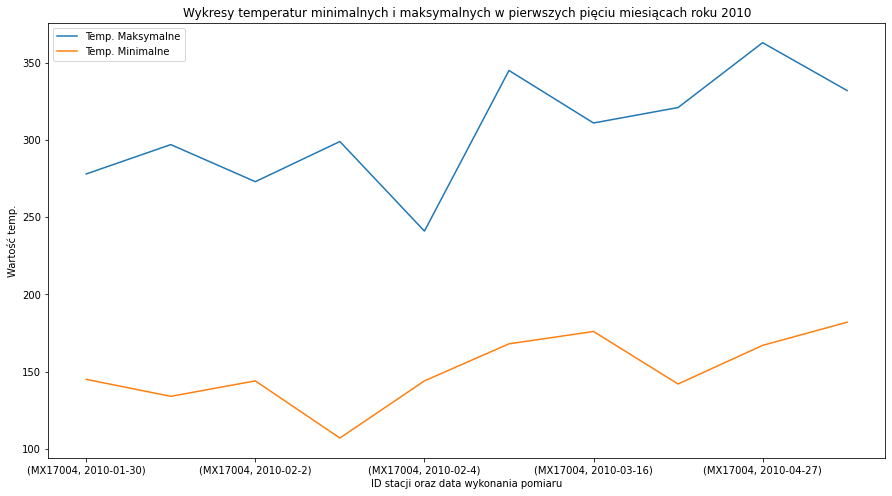

In [19]:

plt.figure(figsize=(15, 8))
dfk.TMAX.plot()
dfk.TMIN.plot()
plt.legend(["Temp. Maksymalne","Temp. Minimalne"])
plt.title("Wykresy temperatur minimalnych i maksymalnych w pierwszych pięciu miesiącach roku 2010")
plt.xlabel("ID stacji oraz data wykonania pomiaru")
plt.ylabel("Wartość temp.")


Co można łatwo zauważyć z powyżej powstałego wykresu temperatury minimalne jak i maksymalne  różniąsię od siebie dość mocno co do wartości. Temperatury minimalne w poszczególych datach zostały uzyskane porą nocną, a najzimniejszym miesiącem roku 2010 był luty. Temperatury stale zwiększały się wraz z upływem czasu i osiągneły swój pik pod koniec kwietnia 2010 roku. Wnioskując po kształcie wykresu przychodzące miesiące również stawałyby się coraz cieplejsze a ogólna średnia temperatura rosłaby wraz z czasem.